<!-- dom:TITLE: Data Analysis and Machine Learning: Introduction and Representing data -->
# Data Analysis and Machine Learning: Introduction and Representing data
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Dec 10, 2017**

Copyright 1999-2017, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## What is Machine Learning?

Machine learning is the science of giving computers the ability to
learn without being explicitly programmed.  The idea is that there
exist generic algorithms which can be used to find patterns in a broad
class of data sets without having to write code specifically for each
problem. The algorithm will build its own logic based on the data.

Machine learning is a subfield of computer science, and is closely
related to computational statistics.  It evolved from the study of
pattern recognition in artificial intelligence (AI) research, and has
made contributions to AI tasks like computer vision, natural language
processing and speech recognition. It has also, especially in later
years, found applications in a wide variety of other areas, including
bioinformatics, economy, physics, finance and marketing.

## Types of Machine Learning


The approaches to machine learning are many, but are often split into two main categories. 
In *supervised learning* we know the answer to a problem,
and let the computer deduce the logic behind it. On the other hand, *unsupervised learning*
is a method for finding patterns and relationship in data sets without any prior knowledge of the system.
Some authours also operate with a third category, namely *reinforcement learning*. This is a paradigm 
of learning inspired by behavioural psychology, where learning is achieved by trial-and-error, 
solely from rewards and punishment.

Another way to categorize machine learning tasks is to consider the desired output of a system.
Some of the most common tasks are:

  * Classification: Outputs are divided into two or more classes. The goal is to   produce a model that assigns inputs into one of these classes. An example is to identify  digits based on pictures of hand-written ones. Classification is typically supervised learning.

  * Regression: Finding a functional relationship between an input data set and a reference data set.   The goal is to construct a function that maps input data to continuous output values.

  * Clustering: Data are divided into groups with certain common traits, without knowing the different groups beforehand.  It is thus a form of unsupervised learning.

## Different algorithms
In this course we will build our machine learning approach on a statistical foundation, with elements 
from data analysis, stochastic processes etc  before we proceed with the following machine learning algorithms

1. Linear regression and its variants

2. Decision tree algorithms, from simpler to more complex ones

3. Nearest neighbors models

4. Bayesian statistics 

5. Support vector machines and finally various variants of

6. Artifical neural networks

Before we proceed however, there are several practicalities with data analysis and software tools we would 
like to present. These tools will help us in our understanding of various machine learning algorithms. 

Our emphasis here is on understanding the mathematical aspects of different algorithms, however, where possible 
we will emphasize the importance of using available software. 


## Software and needed installations
We will make intensive use of python as programming language and the myriad of available libraries. 
Furthermore, you will find IPython/Jupyter notebooks invaluable in your work. 
You can run **R** codes in the Jupyter/IPython notebooks, with the immediate benefit of visualizing your data.


If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn mglearn sympy pandas pillow

For Python3, replace **pip** with **pip3**.

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for pyhton2.7)

etc etc. 

## Python installers
If you don't want to perform these operations separately, we recommend two widely used distrubutions which set up 
all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

## Installing R, C++, cython or Julia

You will also find it convenient to utilize R. 
Jupyter/Ipython notebook allows you run **R** code interactively in your browser. The software library **R** is 
tuned to statistically analysis and allows for an easy usage of the tools we will discuss in these texts.

To install **R** with Jupyter notebook [following the link here](https://mpacer.org/maths/r-kernel-for-ipython-notebook)



## Installing R, C++, cython or Julia


For the C++ affecianodas, Jupyter/IPython notebook allows you also to install C++ and run codes written in this language 
interactively in the browser. Since we will emphasize writing many of the algorithms yourself, you can thus opt for
either Python or C++ as programming languages. 

To add more entropy, **cython** can also be used when running your notebooks. It means that Python with the Jupyter/IPython notebook 
setup allows you to integrate widely popular softwares and tools for scientific computing. With its versatility, 
including symbolic operations, Python offers a unique computational environment. Your Jupyter/IPython notebook 
can easily be converted into a nicely rendered **PDF** file or a Latex file for further processing. For example, convert to latex as

In [1]:
jupyter nbconvert filename.ipynb --to latex

If you use the light mark-up language **doconce** you can convert a standard ascii text file into various HTML 
formats, ipython notebooks, latex files, pdf files etc. 



## Introduction to Jupyter notebook and available tools

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import pandas as pd
from IPython.display import display
eye = np.eye(4)
print(eye)
sparse_mtx = sparse.csr_matrix(eye)
print(sparse_mtx)
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker='x')
plt.show()
data = {'Name': ["John", "Anna", "Peter", "Linda"], 'Location': ["Nairobi", "Napoli", "London", "Buenos Aires"], 'Age':[51, 21, 34, 45]}
data_pandas = pd.DataFrame(data)
display(data_pandas)

## Representing data, more examples

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


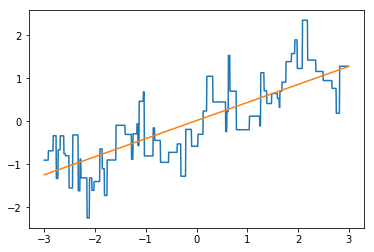

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import pandas as pd
from IPython.display import display
import mglearn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
x, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(x,y)
plt.plot(line, reg.predict(line), label="decision tree")
regline = LinearRegression().fit(x,y)
plt.plot(line, regline.predict(line), label= "Linear Rgression")
plt.show()

## Predator-Prey model from ecology

The population dynamics of a simple predator-prey system is a
classical example shown in many biology textbooks when ecological
systems are discussed. The system contains all elements of the
scientific method:

 * The set up of a specific hypothesis combined with

 * the experimental methods needed (one can study existing data or perform experiments)

 * analyzing and interpreting the data and performing further experiments if needed

 * trying to extract general behaviors and extract eventual laws or patterns

 * develop mathematical relations for the uncovered regularities/laws and test these by per forming new experiments




## Case study from Hudson bay

Lots of data about populations of hares and lynx collected from furs in Hudson Bay, Canada, are available. It is known that the populations oscillate. Why?
Here we start by

1. plotting the data

2. derive a simple model for the population dynamics

3. (fitting parameters in the model to the data)

4. using the model predict the evolution other predator-pray systems



## Hudson bay data



Most mammalian predators rely on a variety of prey, which complicates mathematical modeling; however, a few predators have become highly specialized and seek almost exclusively a single prey species. An example of this simplified predator-prey interaction is seen in Canadian northern forests, where the populations of the lynx and the snowshoe hare are intertwined in a life and death struggle.

One reason that this particular system has been so extensively studied is that the Hudson Bay company kept careful records of all furs from the early 1800s into the 1900s. The records for the furs collected by the Hudson Bay company showed distinct oscillations (approximately 12 year periods), suggesting that these species caused almost periodic fluctuations of each other's populations. The table here shows data from 1900 to 1920.


<table border="1">
<thead>
<tr><th align="center">Year</th> <th align="center">Hares (x1000)</th> <th align="center">Lynx (x1000)</th> </tr>
</thead>
<tbody>
<tr><td align="left">   1900    </td> <td align="right">   30.0             </td> <td align="right">   4.0             </td> </tr>
<tr><td align="left">   1901    </td> <td align="right">   47.2             </td> <td align="right">   6.1             </td> </tr>
<tr><td align="left">   1902    </td> <td align="right">   70.2             </td> <td align="right">   9.8             </td> </tr>
<tr><td align="left">   1903    </td> <td align="right">   77.4             </td> <td align="right">   35.2            </td> </tr>
<tr><td align="left">   1904    </td> <td align="right">   36.3             </td> <td align="right">   59.4            </td> </tr>
<tr><td align="left">   1905    </td> <td align="right">   20.6             </td> <td align="right">   41.7            </td> </tr>
<tr><td align="left">   1906    </td> <td align="right">   18.1             </td> <td align="right">   19.0            </td> </tr>
<tr><td align="left">   1907    </td> <td align="right">   21.4             </td> <td align="right">   13.0            </td> </tr>
<tr><td align="left">   1908    </td> <td align="right">   22.0             </td> <td align="right">   8.3             </td> </tr>
<tr><td align="left">   1909    </td> <td align="right">   25.4             </td> <td align="right">   9.1             </td> </tr>
<tr><td align="left">   1910    </td> <td align="right">   27.1             </td> <td align="right">   7.4             </td> </tr>
<tr><td align="left">   1911    </td> <td align="right">   40.3             </td> <td align="right">   8.0             </td> </tr>
<tr><td align="left">   1912    </td> <td align="right">   57               </td> <td align="right">   12.3            </td> </tr>
<tr><td align="left">   1913    </td> <td align="right">   76.6             </td> <td align="right">   19.5            </td> </tr>
<tr><td align="left">   1914    </td> <td align="right">   52.3             </td> <td align="right">   45.7            </td> </tr>
<tr><td align="left">   1915    </td> <td align="right">   19.5             </td> <td align="right">   51.1            </td> </tr>
<tr><td align="left">   1916    </td> <td align="right">   11.2             </td> <td align="right">   29.7            </td> </tr>
<tr><td align="left">   1917    </td> <td align="right">   7.6              </td> <td align="right">   15.8            </td> </tr>
<tr><td align="left">   1918    </td> <td align="right">   14.6             </td> <td align="right">   9.7             </td> </tr>
<tr><td align="left">   1919    </td> <td align="right">   16.2             </td> <td align="right">   10.1            </td> </tr>
<tr><td align="left">   1920    </td> <td align="right">   24.7             </td> <td align="right">   8.6             </td> </tr>
</tbody>
</table>





## Plotting the data

In [4]:
import numpy as np
from  matplotlib import pyplot as plt

# Load in data file
data = np.loadtxt('src/Hudson_Bay.csv', delimiter=',', skiprows=1)
# Make arrays containing x-axis and hares and lynx populations
year = data[:,0]
hares = data[:,1]
lynx = data[:,2]

plt.plot(year, hares ,'b-+', year, lynx, 'r-o')
plt.axis([1900,1920,0, 100.0])
plt.xlabel(r'Year')
plt.ylabel(r'Numbers of hares and lynx ')
plt.legend(('Hares','Lynx'), loc='upper right')
plt.title(r'Population of hares and lynx from 1900-1920 (x1000)}')
plt.savefig('Hudson_Bay_data.pdf')
plt.savefig('Hudson_Bay_data.png')
plt.show()

## Hares and lynx in Hudson bay from 1900 to 1920

<!-- dom:FIGURE: [fig/Hudson_Bay_data.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="fig/Hudson_Bay_data.png" width=700>

<!-- end figure -->




## Why now create a computer model for the hare and lynx populations?
We see from the plot that there are indeed fluctuations.
We would like to create a mathematical model that explains these
population fluctuations. Ecologists have predicted that in a simple
predator-prey system that a rise in prey population is followed (with
a lag) by a rise in the predator population. When the predator
population is sufficiently high, then the prey population begins
dropping. After the prey population falls, then the predator
population falls, which allows the prey population to recover and
complete one cycle of this interaction. Thus, we see that
qualitatively oscillations occur. Can a mathematical model predict
this? What causes cycles to slow or speed up? What affects the
amplitude of the oscillation or do you expect to see the oscillations
damp to a stable equilibrium? The models tend to ignore factors like
climate and other complicating factors. How significant are these?

 * We see oscillations in the data

 * What causes cycles to slow or speed up?

 * What affects the amplitude of the oscillation or do you expect to see the oscillations damp to a stable equilibrium?

 * With a model we can better *understand the data*

 * More important: we can understand the ecology dynamics of
   predator-pray populations




## The traditional (top-down) approach

The classical way (in all books) is to present the Lotka-Volterra equations:

$$
\begin{align*}
\frac{dH}{dt} &= H(a - b L)\\
\frac{dL}{dt} &= - L(d - c  H)
\end{align*}
$$

Here,

 * $H$ is the number of preys

 * $L$ the number of predators

 * $a$, $b$, $d$, $c$ are parameters

Most books quickly establish the model and then use considerable space on
discussing the qualitative properties of this *nonlinear system of
ODEs* (which cannot be solved)





## Basic  mathematics notation
 * Time points: $t_0,t_1,\ldots,t_m$

 * Uniform distribution of time points: $t_n=n\Delta t$

 * $H^n$: population of hares at time $t_n$

 * $L^n$: population of lynx at time $t_n$

 * We want to model the changes in populations, $\Delta H=H^{n+1}-H^n$
   and $\Delta L=L^{n+1}-L^n$ during a general time interval $[t_{n+1},t_n]$
   of length $\Delta t=t_{n+1}-t_n$



## Basic dynamics of the population of hares

The population of hares evolves due to births and deaths exactly as a bacteria population:

$$
\Delta H = a \Delta t H^n
$$

However, hares have an additional loss in the population because
they are eaten by lynx.
All the hares and lynx can form
$H\cdot L$ pairs in total. When such pairs meet during a time
interval $\Delta t$, there is some
small probablity that the lynx will eat the hare.
So in fraction $b\Delta t HL$, the lynx eat hares. This
loss of hares must be accounted for. Subtracted in the equation for hares:

$$
\Delta H = a\Delta t H^n - b \Delta t H^nL^n
$$

## Basic dynamics of the population of lynx

We assume that the primary growth for the lynx population depends on sufficient food for raising lynx kittens, which implies an adequate source of nutrients from predation on hares. Thus, the growth of the lynx population does not only depend of how many lynx there are, but on how many hares they can eat.
In a time interval $\Delta t HL$ hares and lynx can meet, and in a
fraction $b\Delta t HL$ the lynx eats the hare. All of this does not
contribute to the growth of lynx, again just a fraction of
$b\Delta t HL$ that we write as
$d\Delta t HL$. In addition, lynx die just as in the population
dynamics with one isolated animal population, leading to a loss
$-c\Delta t L$.



The accounting of lynx then looks like

$$
\Delta L = d\Delta t H^nL^n - c\Delta t L^n
$$

## Evolution equations

By writing up the definition of $\Delta H$ and $\Delta L$, and putting
all assumed known terms $H^n$ and $L^n$ on the right-hand side, we have

$$
H^{n+1} = H^n + a\Delta t H^n - b\Delta t H^n L^n
$$

$$
L^{n+1} = L^n + d\Delta t H^nL^n - c\Delta t L^n
$$

Note:

 * These equations are ready to be implemented!

 * But to start, we need $H^0$ and $L^0$ 
   (which we can get from the data)

 * We also need values for $a$, $b$, $d$, $c$



## Adapt the model to the Hudson Bay case

 * As always, models tend to be general - as here, applicable
   to "all" predator-pray systems

 * The critical issue is whether the *interaction* between hares and lynx
   is sufficiently well modeled by $\hbox{const}HL$

 * The parameters $a$, $b$, $d$, and $c$ must be
   estimated from data

 * Measure time in years

 * $t_0=1900$, $t_m=1920$



## The program

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def solver(m, H0, L0, dt, a, b, c, d, t0):
    """Solve the difference equations for H and L over m years
    with time step dt (measured in years."""

    num_intervals = int(m/float(dt))
    t = np.linspace(t0, t0 + m, num_intervals+1)
    H = np.zeros(t.size)
    L = np.zeros(t.size)

    print('Init:', H0, L0, dt)
    H[0] = H0
    L[0] = L0

    for n in range(0, len(t)-1):
        H[n+1] = H[n] + a*dt*H[n] - b*dt*H[n]*L[n]
        L[n+1] = L[n] + d*dt*H[n]*L[n] - c*dt*L[n]
    return H, L, t

# Load in data file
data = np.loadtxt('src/Hudson_Bay.csv', delimiter=',', skiprows=1)
# Make arrays containing x-axis and hares and lynx populations
t_e = data[:,0]
H_e = data[:,1]
L_e = data[:,2]

# Simulate using the model
H, L, t = solver(m=20, H0=34.91, L0=3.857, dt=0.1,
                 a=0.4807, b=0.02482, c=0.9272, d=0.02756,
                 t0=1900)

# Visualize simulations and data
plt.plot(t_e, H_e, 'b-+', t_e, L_e, 'r-o', t, H, 'm--', t, L, 'k--')
plt.xlabel('Year')
plt.ylabel('Numbers of hares and lynx')
plt.axis([1900, 1920, 0, 140])
plt.title(r'Population of hares and lynx 1900-1920 (x1000)')
plt.legend(('H_e', 'L_e', 'H', 'L'), loc='upper left')
plt.savefig('Hudson_Bay_sim.pdf')
plt.savefig('Hudson_Bay_sim.png')
plt.show()

## The plot

<!-- dom:FIGURE: [fig/Hudson_Bay_sim.png, width=700 frac=0.9] -->
<!-- begin figure -->

<p></p>
<img src="fig/Hudson_Bay_sim.png" width=700>

<!-- end figure -->


If we perform a least-square fitting, we can find optimal values for the parameters $a$, $b$, $d$, $c$. The optimal parameters are $a=0.4807$, $b=0.02482$, $d=0.9272$ and $c=0.02756$. These parameters result in a slightly modified initial conditions, namely $H(0) = 34.91$ and $L(0)=3.857$. With these parameters we are now ready to solve the equations and plot these data together with the experimental values.


## Linear regression in Python

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


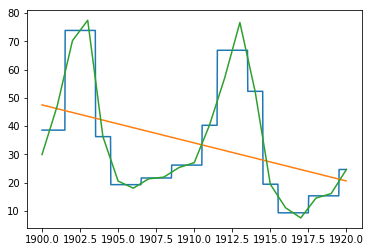

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


data = np.loadtxt('src/Hudson_Bay.csv', delimiter=',', skiprows=1)
x = data[:,0]
y = data[:,1]
line = np.linspace(1900,1920,1000,endpoint=False).reshape(-1,1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(line, reg.predict(line), label="decision tree")
regline = LinearRegression().fit(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(line, regline.predict(line), label= "Linear Regression")
plt.plot(x, y, label= "Linear Regression")
plt.show()

## Linear Least squares in R

        HudsonBay = read.csv("src/Hudson_Bay.csv",header=T)
        fix(HudsonBay)
        dim(HudsonBay)
        names(HudsonBay)
        plot(HudsonBay$Year, HudsonBay$Hares..x1000.)
        attach(HudsonBay)
        plot(Year, Hares..x1000.)
        plot(Year, Hares..x1000., col="red", varwidth=T, xlab="Years", ylab="Haresx 1000")
        summary(HudsonBay)
        summary(Hares..x1000.)
        library(MASS)
        library(ISLR)
        scatter.smooth(x=Year, y = Hares..x1000.)
        linearMod = lm(Hares..x1000. ~ Year)
        print(linearMod)
        summary(linearMod)
        plot(linearMod)
        confint(linearMod)
        predict(linearMod,data.frame(Year=c(1910,1914,1920)),interval="confidence")


## Non-Linear Least squares in R

        set.seed(1485)
        len = 24
        x = runif(len)
        y = x^3+rnorm(len, 0,0.06)
        ds = data.frame(x = x, y = y)
        str(ds)
        plot( y ~ x, main ="Known cubic with noise")
        s  = seq(0,1,length =100)
        lines(s, s^3, lty =2, col ="green")
        m = nls(y ~ I(x^power), data = ds, start = list(power=1), trace = T)
        class(m)
        summary(m)
        power = round(summary(m)$coefficients[1], 3)
        power.se = round(summary(m)$coefficients[2], 3)
        plot(y ~ x, main = "Fitted power model", sub = "Blue: fit; green: known")
        s = seq(0, 1, length = 100)
        lines(s, s^3, lty = 2, col = "green")
        lines(s, predict(m, list(x = s)), lty = 1, col = "blue")
        text(0, 0.5, paste("y =x^ (", power, " +/- ", power.se, ")", sep = ""), pos = 4)
